# Minha primeira rede neural artificial 

### Donwload dataset

https://www.kaggle.com/tongpython/cat-and-dog/downloads/cat-and-dog.zip/1

## Instalando tensorflow e keras

![title](img/tensor_keras.png)

## Dataset


 <img src="img/data.jpeg" alt="Drawing" style="width: 600px;"/>


## Importando as bibliotecas necessárias

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint


## Arquitetura da rede

### Classic VGG model 


![title](img/cnn.jpeg)

In [11]:
# Initialising the CNN
classifier = Sequential()
# https://keras.io/models/sequential/

## Convolução


![title](img/convolucao.gif)

In [12]:
#1º camada
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# 2º camada
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

## Pooling
### Max Pooling

<img src="img/max-pooling.png" alt="Drawing" style="width: 500px;"/>


In [13]:
classifier.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

## Função de ativação


Função de ativação é uma função utilizada para se obter a saída do nó. É usado para determinar a saída da rede neural como sim ou não. Ele mapeia os valores resultantes entre 0 a 1 ou -1 a 1 etc. (dependendo da função)

![title](img/funcao_ativacao.png)

In [14]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
__________

In [15]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mae', 'acc'])


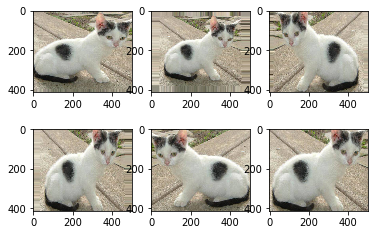

In [16]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

img = load_img('dataset/training_set/cats/cat.3.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in train_datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure()
for i, file in enumerate(os.listdir('preview')[0:6]):
    fullpath = 'preview'+ "\\" + file
    #print(fullpath)
    img=mpimg.imread(fullpath)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)

## Treinamento

In [17]:
batch_size = 64
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (200, 200),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary',
                                                shuffle=False)


Found 8000 images belonging to 2 classes.


## Teste

In [18]:

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (200, 200),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                           shuffle=False)

Found 2000 images belonging to 2 classes.


# O que é "generator"?

"Generator" é usado quando se tem datasets grandes e deseja-se remover dados duplicados.
Sem o "generator" seria necessário colocar todos os dados em um numpy array. 

<img src="img/generator.png" alt="Drawing" style="width: 500px;"/>



## Fit

In [59]:

model_fit = classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 2,
                        callbacks=[ModelCheckpoint('checkpoints', monitor='val_acc', save_best_only=True)])


Epoch 1/5
10/10 [==============================] - 62s 6s/step - loss: 9.5654 - mean_absolute_error: 0.6000 - acc: 0.4000 - val_loss: 15.9424 - val_mean_absolute_error: 1.0000 - val_acc: 0.0000e+00
Epoch 2/5
10/10 [==============================] - 62s 6s/step - loss: 5.5798 - mean_absolute_error: 0.3500 - acc: 0.6500 - val_loss: 15.9424 - val_mean_absolute_error: 1.0000 - val_acc: 0.0000e+00
Epoch 3/5
10/10 [==============================] - 62s 6s/step - loss: 7.9712 - mean_absolute_error: 0.5000 - acc: 0.5000 - val_loss: 15.9424 - val_mean_absolute_error: 1.0000 - val_acc: 0.0000e+00
Epoch 4/5
10/10 [==============================] - 49s 5s/step - loss: 9.5654 - mean_absolute_error: 0.6000 - acc: 0.4000 - val_loss: 15.9424 - val_mean_absolute_error: 1.0000 - val_acc: 0.0000e+00
Epoch 5/5
10/10 [==============================] - 42s 4s/step - loss: 12.7539 - mean_absolute_error: 0.8000 - acc: 0.2000 - val_loss: 15.9424 - val_mean_absolute_error: 1.0000 - val_acc: 0.0000e+00


## Avaliação do modelo

In [63]:
def avaliarModelo(model_fit):
    acc = model_fit.history['acc']
    val_acc = model_fit.history['val_acc']
    loss = model_fit.history['loss']
    val_loss = model_fit.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

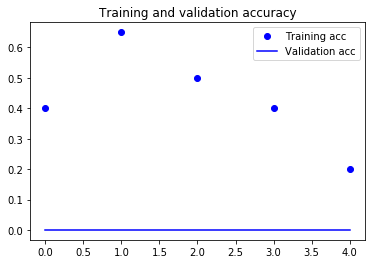

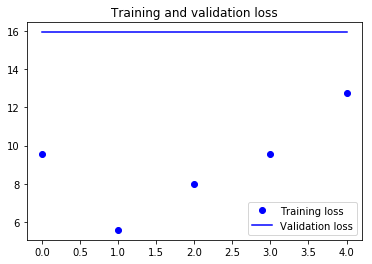

In [64]:
avaliarModelo(model_fit)

## Salvando o modelo

In [27]:
classifier.save('cats_and_dogs_3_camadas_teste.h5')
classifier.save_weights('cats_and_dogs_3_camadas_weights_teste.h5')



## Lendo um modelo salvo

In [60]:
from keras.models import load_model
model = load_model('cats_and_dogs_3_camadas_teste.h5')
wei = model.load_weights('cats_and_dogs_3_camadas_weights_teste.h5')
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mae', 'acc'])


In [62]:
avaliarModelo(model)

AttributeError: 'Sequential' object has no attribute 'history'

## Testando o modelo preditivo

In [53]:
from keras.preprocessing import image
import numpy as np
img = image.load_img("oliver_2.jpg", target_size = (200, 200))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.
# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 200, 200, 3)


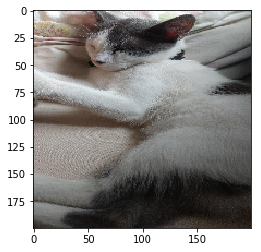

In [54]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [55]:
training_set.class_indices

#The subdirectory “cats” comes before “dogs“, therefore the class labels are assigned the integers: cat=0, dog=1.

{'cats': 0, 'dogs': 1}

In [57]:
prediction = classifier.predict(img_tensor)
if prediction[0][0] >=0.5:
    print("It is a dog: ")
else:
    print("It is a cat: ")
print(prediction)

It is a dog: 
[[1.]]
